# **Interactuando con la API de Spotify**

In [16]:
# Bibliotecas necesarias
import os
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import seaborn as sns



# Paso 1: Crear una cuenta de desarrollador de Spotify
# Paso 2: Configuración inicial

# Paso 3: Variables de entorno

In [17]:
load_dotenv()

client_credentials_manager = SpotifyClientCredentials(
    client_id = os.environ.get("CLIENT_ID"),
    client_secret = os.environ.get("CLIENT_SECRET")
    )


# Paso 4: Inicializar la biblioteca Spotipy

In [18]:
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

# Paso 5: Realizar solicitudes a la API

In [19]:
artist_id = "3TVXtAsR1Inumwj472S9r4"

response = sp.artist_top_tracks("3TVXtAsR1Inumwj472S9r4")
if response:
  # We keep the "tracks" object of the answer
  tracks = response["tracks"]
  # We select, for each song, the data we are interested in and discard the rest
  tracks = [{k: (v/(1000*60))%60 if k == "duration_ms" else v for k, v in track.items() if k in ["name", "popularity", "duration_ms"]} for track in tracks]

# Paso 6: Transformar a Pandas DataFrame

In [20]:

tracks_df = pd.DataFrame.from_records(tracks)
tracks_df.sort_values(["popularity"], inplace = True)

print(tracks_df.head(3))

   duration_ms        name  popularity
3     5.097333    She Will          81
9     3.933100   Headlines          82
6     3.316217  God's Plan          83


# Paso 7: Analizar relación estadística

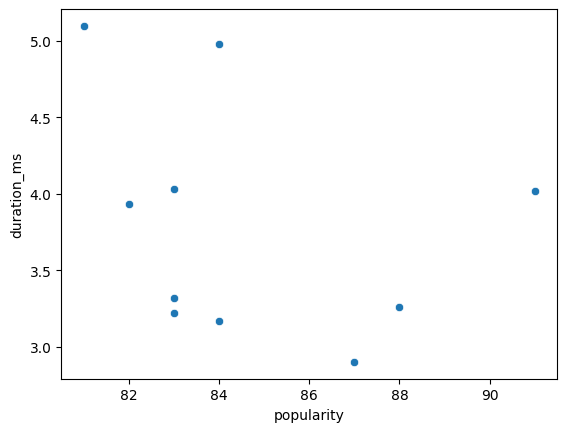

In [21]:
scatter_plot = sns.scatterplot(data = tracks_df, x = "popularity", y = "duration_ms")
fig = scatter_plot.get_figure()
fig.savefig("scatter_plot.png")